In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime 
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [3]:
# Make a copy of original data frame
bankPromoModel_hsng_Df = bankPromo_df.copy()
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng_Df['Target'] = bankPromoModel_hsng_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng_Df['housing']

# List final variables of the new dataset
bankPromoModel_hsng_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
Subscribed    45211 non-null object
Target        45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [4]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('housing')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']


In [5]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_h_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_h_df = bankPromoAdditional_h_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_h_df['Target'] = bankPromoAdditional_h_df['Target'].astype(np.int)
# Delete the original 'housing' column
del bankPromoAdditional_h_df['housing']

bankPromoAdditional_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
Target        4521 non-null int64
dtypes: int64(8), object(9)
memory usage: 600.5+ KB


In [6]:
## Training Dataset
###################
# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng_Df = pd.concat((bankPromoModel_hsng_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng_Df.drop(categoricalVars, inplace=True, axis=1)
print("Training dataset info")
print("=====================")
bankPromoModel_hsng_Df.info()


## Test Dataset
###################
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_h_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_h_df = pd.concat((bankPromoAdditional_h_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_h_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_h_df:
    y_Final = bankPromoAdditional_h_df['Target'].values # get the labels we want
    del bankPromoAdditional_h_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_h_df.values

print("Test dataset info")
print("=====================")
bankPromoAdditional_h_df.info()

Training dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital_married        45211 non-

In [7]:
# Training and Test Split
# Since housing is a balanced dataset ( with 56% yes and 44% No , we will use simple KFold and ShuffleSplit cv objects)
from sklearn.model_selection import KFold
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

if 'Target' in bankPromoModel_hsng_Df:
    y = bankPromoModel_hsng_Df['Target'].values # get the labels we want
    del bankPromoModel_hsng_Df['Target']        # get rid of the class label
    X = bankPromoModel_hsng_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
kfold_cv_object = KFold(n_splits=num_cv_iterations , shuffle = False , random_state=999)
#n_splits=num_cv_iterations,test_size  = 0.2, random_state=999
                         
print(kfold_cv_object)


KFold(n_splits=10, random_state=999, shuffle=False)


In [8]:
from sklearn.model_selection import ShuffleSplit
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 10
shuffle_cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size = 0.1, random_state=999)
                         
print(shuffle_cv_object)


ShuffleSplit(n_splits=10, random_state=999, test_size=0.1, train_size=None)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#from sklearn import metrics as mt

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold = cross_validate(logisticModel , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold))
display(pd.DataFrame(scores_kfold).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle = cross_validate(logisticModel , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle))
display(pd.DataFrame(scores_shuffle).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.450316,0.081682,0.944613,0.744731,0.574595,0.816525,0.895179,0.735653,0.897026,0.745085,0.997532,0.744378
1,1.145355,0.032569,0.853853,0.751690,0.585188,0.824778,0.752931,0.745441,0.908155,0.759814,0.805679,0.743738
2,1.383156,0.082950,0.500095,0.809596,0.627755,0.842207,0.418491,0.771393,0.343252,0.786260,0.920868,0.834360
3,1.211065,0.064512,0.088985,0.800577,0.538850,0.849564,0.438399,0.779258,0.553571,0.802252,0.048381,0.798910
4,1.630997,0.108196,0.245889,0.792216,0.669035,0.821917,0.786994,0.748071,0.583643,0.775076,0.155754,0.810132
5,1.315789,0.110831,0.589965,0.786047,0.761793,0.834171,0.685468,0.757459,0.718904,0.786781,0.500244,0.785315
6,1.980634,0.113945,0.455639,0.792433,0.696505,0.838219,0.629507,0.761637,0.705231,0.781841,0.336534,0.803315
7,3.372326,0.025399,0.878076,0.754189,0.772716,0.822239,0.807122,0.742910,0.891286,0.762158,0.865252,0.746384
8,1.826371,0.103036,0.900643,0.760999,0.843795,0.821424,0.846273,0.741927,0.857376,0.755513,0.948509,0.766564
9,1.895442,0.112552,0.377330,0.800705,0.646789,0.829805,0.630613,0.758245,0.292317,0.784790,0.532072,0.817279


fit_time           1.721145
score_time         0.083567
test_F1_Score      0.583509
train_F1_Score     0.779318
test_AUC           0.671702
train_AUC          0.830085
test_Accuracy      0.689098
train_Accuracy     0.754199
test_Precision     0.675076
train_Precision    0.773957
test_Recall        0.611083
train_Recall       0.785038
dtype: float64

time taken for Logistic Regression with Kfold cv object
0:00:05.363525




,fit_time,score_time,test_F1_Score,train_F1_Score,test_AUC,train_AUC,test_Accuracy,train_Accuracy,test_Precision,train_Precision,test_Recall,train_Recall
0,1.012601,0.089961,0.775268,0.778873,0.827495,0.829789,0.749226,0.752341,0.772817,0.773088,0.777734,0.784745
1,0.964331,0.072015,0.788132,0.777873,0.835868,0.828969,0.764706,0.750915,0.783452,0.771800,0.792869,0.784042
2,1.537508,0.222131,0.781732,0.778234,0.838677,0.828603,0.755860,0.751505,0.779882,0.771818,0.783591,0.784757
3,0.961437,0.031959,0.782011,0.778980,0.833091,0.829254,0.754533,0.751923,0.767836,0.772082,0.796719,0.786002
4,1.520893,0.205520,0.787298,0.777795,0.838792,0.828522,0.764485,0.750424,0.781833,0.770829,0.792840,0.784888
5,1.124076,0.167221,0.782333,0.777182,0.831703,0.829384,0.756966,0.750694,0.785601,0.771488,0.779093,0.782961
6,1.517634,0.234770,0.774514,0.778807,0.824351,0.830311,0.748784,0.751702,0.763302,0.772398,0.786060,0.785323
7,1.042382,0.117676,0.784175,0.778467,0.830246,0.829594,0.756303,0.751604,0.776270,0.771416,0.792244,0.785648
8,1.107462,0.163794,0.768526,0.779437,0.823310,0.830286,0.743034,0.752734,0.761247,0.773889,0.775945,0.785064
9,1.280469,0.254053,0.771485,0.779353,0.821751,0.830526,0.744803,0.752587,0.762128,0.773370,0.781075,0.785430


fit_time           1.206879
score_time         0.155910
test_F1_Score      0.779547
train_F1_Score     0.778500
test_AUC           0.830528
train_AUC          0.829524
test_Accuracy      0.753870
train_Accuracy     0.751643
test_Precision     0.773437
train_Precision    0.772218
test_Recall        0.785817
train_Recall       0.784886
dtype: float64

time taken for Logistic Regression with Shuffle cv object
0:00:03.056319



In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel2 = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold2 = cross_validate(logisticModel2 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold2))
display(pd.DataFrame(scores_kfold2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

start = datetime.now()
scores_shuffle2 = cross_validate(logisticModel2 , X, y=y , cv = shuffle_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_shuffle2))
display(pd.DataFrame(scores_shuffle2).mean())
end = datetime.now()
print("time taken for Logistic Regression with Shuffle cv object")
print(end-start)
print()

KeyboardInterrupt: 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## polynomial of degree 3

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
#modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])
scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel3 = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(),  LogisticRegression(penalty='l1', C=1.0, class_weight=None, random_state=999))

start = datetime.now()
scores_kfold3 = cross_validate(logisticModel3 , X, y=y , cv = kfold_cv_object , n_jobs = -1 , scoring = scoring)
print()
display(pd.DataFrame(scores_kfold3))
display(pd.DataFrame(scores_kfold3).mean())
end = datetime.now()
print("time taken for Logistic Regression with Kfold cv object")
print(end-start)
print()

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [12]:
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel_hsng = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,\
                                                                   class_weight=None, random_state=999, \
                                                                   solver='liblinear'))

# Fit the whole training dataset now, since validation would be done on additional dataset
logisticModel_hsng.fit(X,y) 


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=999, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

month_aug has weight of -0.8218628950391069
month_jun has weight of -0.5133341448160301
age has weight of -0.34770226933321735
month_jul has weight of -0.33220739932727494
month_feb has weight of -0.30404985578636573
job_student has weight of -0.22988748239885679
month_jan has weight of -0.22253849443036647
month_sep has weight of -0.21539655032188795
month_oct has weight of -0.21510749445317282
Subscribed_yes has weight of -0.21215548328157324
marital_single has weight of -0.20484945430155518
job_retired has weight of -0.20184431125055394
job_unknown has weight of -0.17482419363925225
month_mar has weight of -0.16931229467715017
month_nov has weight of -0.15485144923926913
month_dec has weight of -0.13779270226243612
poutcome_success has weight of -0.129397873403932
day has weight of -0.11747150978928093
job_housemaid has weight of -0.10265694596297165
job_unemployed has weight of -0.09149545724925516
contact_telephone has weight of -0.06990443794177106
education_unknown has weight of

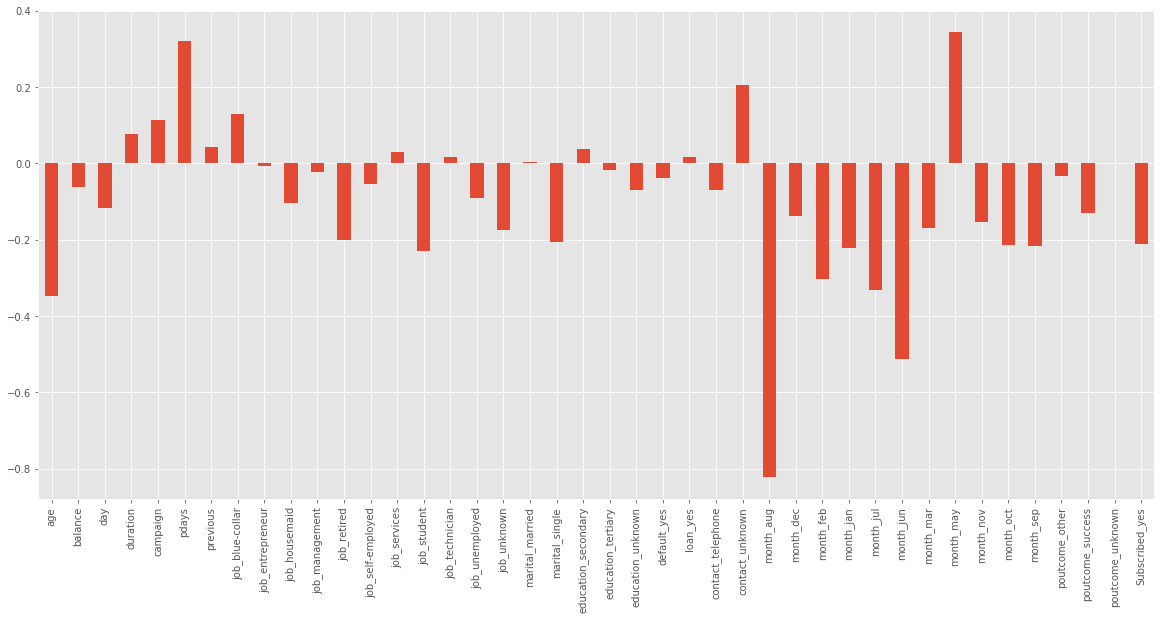

In [13]:
classifier_model = logisticModel_hsng.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_hsng_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_hsng_Df.columns)
weights.plot(kind='bar')
plt.show()

Based on the magnitude of the coefficients in above plot features- Month_Aug, Month_Jun, Age, Month_May, Month_Jul and PDays are among the most important features.

As identified during the EDA in Lab 1, the clients could be contacted over a few months, but each of the months listed corresponds to the last month the client was contacted.  The months that affect the housing model the most are August, June, May and July.   It is necessary to note the difference between the housing and the subscribe models - the subscribe model does not weight any months with a high coefficient until the fifth variable.  Also, most of the months in the housing model have negative coeffecients where the subscribe model are equally distributed between the months. 

The age of the client, which is the first non-month feature, is in the top 6.  The age of prospective clients for home loans sounds as if that feature would be significant, for example a 30 year old person is more likely to have a home loan as compared to an 18 year old.  

Pdays is the last feature we will mention as significant (we were going to only mention the top 5 but continued until the next non-month attribute).  Pdays is also the first non-month attribute to have a positive coefficient with Month_May being the only other feature mentioned here.  Pdays is the number of days of contact between the current marketing campaign and a previous campaign.  From the EDA in Lab 1, we discovered that 80% of the clients in this campaign were new to marketing campaigns from the bank.  The right skewness of the data for this feature could have affected the singifance into the model.

In [16]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = kfold_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 75.43120063354607, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} with a score of 0.69


In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.exceptions import DataConversionWarning


param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear']
   }


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

grid = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999, class_weight=None)), \
                   param_grid = param_grid, cv = shuffle_cv_object , verbose=False, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

# Fit on data

grid.fit(X, y=y)
  
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'logisticregression__C': 0.0020235896477251557, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'} with a score of 0.75


In [13]:
# create dataframes on selected features
## based on 2 methods 18 features
bankPromoModel_hsng218_Df = bankPromo_df.copy()
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['housing'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_hsng218_Df['Target'] = bankPromoModel_hsng218_Df['Target'].astype(np.int)

# Delete the original 'housing' column
del bankPromoModel_hsng218_Df['housing']
del bankPromoModel_hsng218_Df['default']
del bankPromoModel_hsng218_Df['previous']
del bankPromoModel_hsng218_Df['marital']
del bankPromoModel_hsng218_Df['duration']
del bankPromoModel_hsng218_Df['day']
del bankPromoModel_hsng218_Df['campaign']
del bankPromoModel_hsng218_Df['balance']


# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars218 = list()
# List to hold names of numerical variables
numericalVars218 = list()

for colName in bankPromoModel_hsng218_Df.columns:
    if bankPromoModel_hsng218_Df[colName].dtype == np.int64:
        numericalVars218.append(colName)
    elif bankPromoModel_hsng218_Df[colName].dtype == np.object:
        categoricalVars218.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
#categoricalVars618.remove('Target')

print(numericalVars218)
print(categoricalVars218)

# Convert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars218:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_hsng218_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_hsng218_Df = pd.concat((bankPromoModel_hsng218_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_hsng218_Df.drop(categoricalVars218, inplace=True, axis=1)
bankPromoModel_hsng218_Df.info()

['age', 'pdays', 'Target']
['job', 'education', 'loan', 'contact', 'month', 'poutcome', 'Subscribed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                    45211 non-null int64
pdays                  45211 non-null int64
Target                 45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_unknown      45211 non-null uint8
loan_yes               45211 non-null uin